# XGBoost Classifier

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset_train = pd.read_csv('train_new.csv')
X_train = dataset_train.iloc[:, 1:].values
y_train = dataset_train.iloc[:, 0].values

In [3]:
dataset_test = pd.read_csv('test_new.csv')
X_test = dataset_test.iloc[:, 1:].values
y_test = dataset_test.iloc[:, 0].values

## Splitting the dataset into the Training set and Test set

In [4]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Feature Scaling

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the XGboost mode on the Training set

In [6]:
import xgboost as xgb
classifier = xgb.XGBClassifier(objective="binary:logistic", random_state = 0)
classifier.fit(X_train, y_train)

/home/nikhil/.virtualenvs/pytorch/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[14:33:24] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### Confusion matrix on training 

In [7]:
from sklearn.metrics import confusion_matrix, f1_score
x_pred = classifier.predict(X_train)
cm_t = confusion_matrix(y_train, x_pred)
print(cm_t)
f1_score(y_train, x_pred, average='weighted')

[[987   0]
 [  0 413]]


1.0

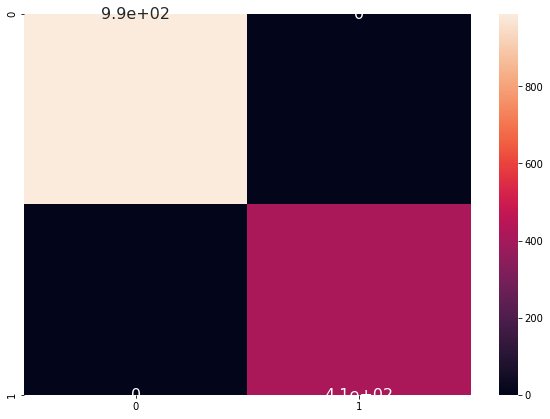

In [8]:
import seaborn as sns
df_cm = pd.DataFrame(cm_t, range(len(cm_t)), range(len(cm_t)))
plt.figure(figsize=(10,7))
# sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16})
plt.show()

## Making the Confusion Matrix

In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support, classification_report
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
# accuracy_score(y_test, y_pred)
f1_score(y_test, y_pred, average='weighted')

[[441  55]
 [  4   0]]


0.9298023379383633

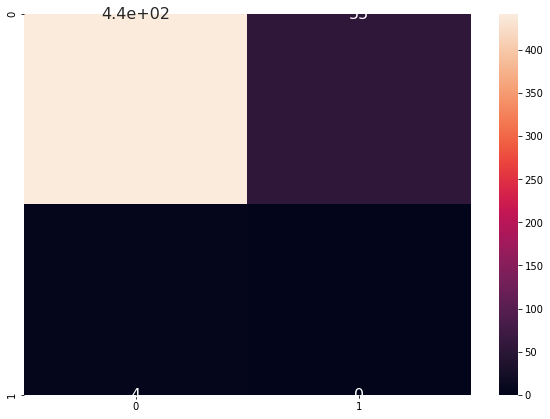

In [10]:
import seaborn as sns
df_cm = pd.DataFrame(cm, range(len(cm)), range(len(cm)))
plt.figure(figsize=(10,7))
# sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16})
plt.show()

In [11]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.89      0.94       496
         1.0       0.00      0.00      0.00         4

    accuracy                           0.88       500
   macro avg       0.50      0.44      0.47       500
weighted avg       0.98      0.88      0.93       500

